In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from keras.utils import np_utils

%matplotlib inline

import check_miss_value


In [2]:
# csv ファイルから読み込み
train_csv = pd.read_csv('./train.csv')
test_csv = pd.read_csv('./test.csv')

In [3]:
# train Survived あり
# test PassengerId あり
train_csv.shape, test_csv.shape

((891, 12), (418, 11))

In [4]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_csv.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
train_csv.corr()[train_csv.corr() < -0.2]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Survived,NaN,NaN,-0.338481,NaN,NaN,NaN,NaN
Pclass,NaN,-0.338481,NaN,-0.369226,NaN,NaN,-0.5495
Age,NaN,NaN,-0.369226,NaN,-0.308247,NaN,NaN
SibSp,NaN,NaN,NaN,-0.308247,NaN,NaN,NaN
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,NaN,NaN,-0.549500,NaN,NaN,NaN,NaN


In [9]:
train_csv.corr()[train_csv.corr() > 0.2]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Survived,NaN,1.000000,NaN,NaN,NaN,NaN,0.257307
Pclass,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,1.0,NaN,NaN,NaN
SibSp,NaN,NaN,NaN,NaN,1.000000,0.414838,NaN
Parch,NaN,NaN,NaN,NaN,0.414838,1.000000,0.216225
Fare,NaN,0.257307,NaN,NaN,NaN,0.216225,1.000000


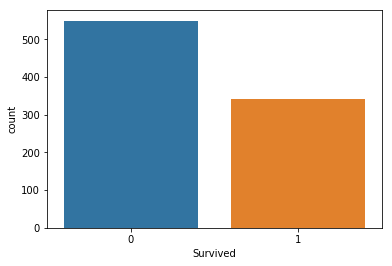

In [19]:
sns.countplot(x='Survived', data=train_csv)

In [20]:
# 生存者の割合
train_csv.Survived.sum() / train_csv.Survived.count()

0.3838383838383838

In [21]:
train_csv.Survived[train_csv.Survived == 1].count() / train_csv.Survived.count()

0.3838383838383838

In [22]:
train_csv.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

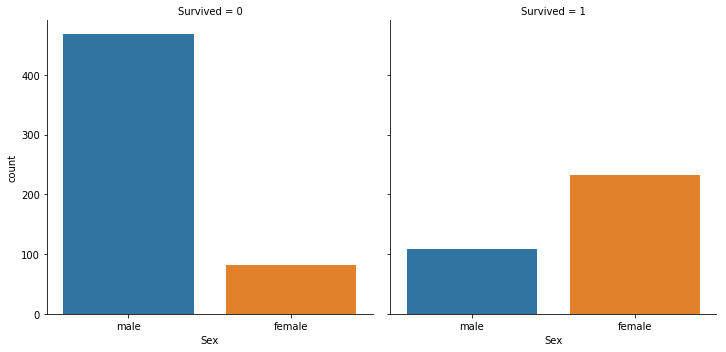

In [23]:
sns.catplot(x='Sex', col='Survived', data=train_csv, kind='count')

In [24]:
train_csv.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Survived(female)')

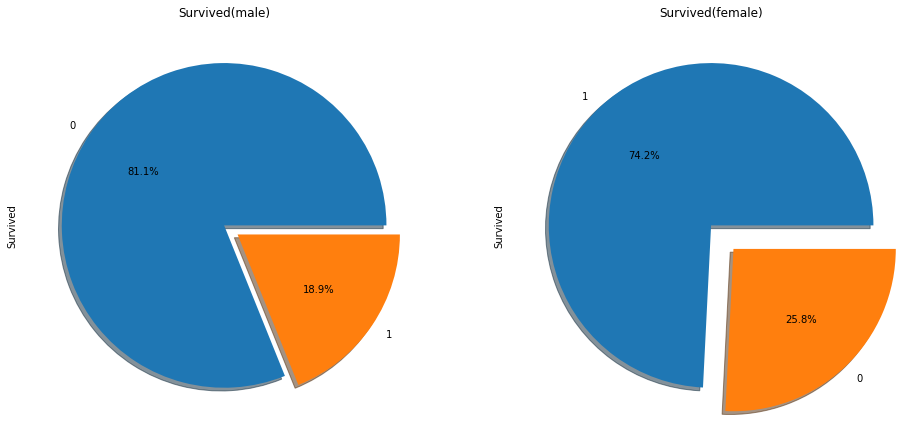

In [25]:
# 円グラフ
f, ax = plt.subplots(1, 2, figsize=(16, 8))
f.patch.set_facecolor('white')
train_csv['Survived'][train_csv['Sex'] == 'male'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
train_csv['Survived'][train_csv['Sex'] == 'female'].value_counts().plot.pie(explode=[0, 0.2], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('Survived(male)')
ax[1].set_title('Survived(female)')

In [26]:
train_csv['Survived'][train_csv['Sex'] == 'female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [27]:
# cross table
pd.crosstab(train_csv.Pclass, train_csv.Survived, margins=True).style.background_gradient(cmap='autumn_r').set_properties(color='black')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [28]:
pd.crosstab(train_csv.Pclass, train_csv.Survived, margins=True, margins_name='Total')

Survived,0,1,Total
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
Total,549,342,891


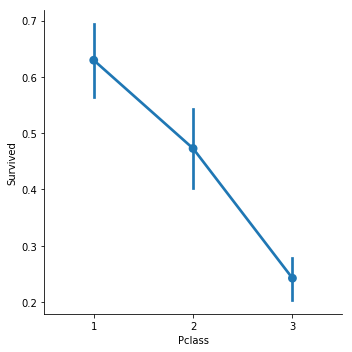

In [29]:
sns.catplot('Pclass', 'Survived', kind='point', data=train_csv)

In [30]:
pd.crosstab([train_csv.Survived], train_csv.Pclass, margins=True).style.background_gradient(cmap='autumn_r').set_properties(color='black')

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [31]:
pd.crosstab([train_csv.Sex, train_csv.Survived], train_csv.Pclass, margins=True).style.background_gradient(cmap='autumn_r').set_properties(color='black')

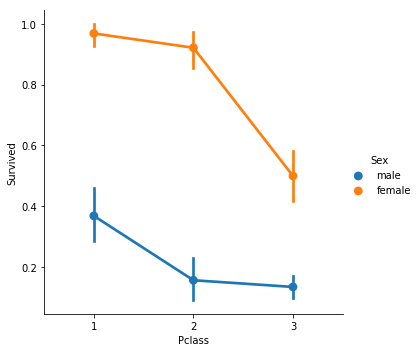

In [32]:
sns.catplot('Pclass', 'Survived', hue='Sex', kind='point', data=train_csv)

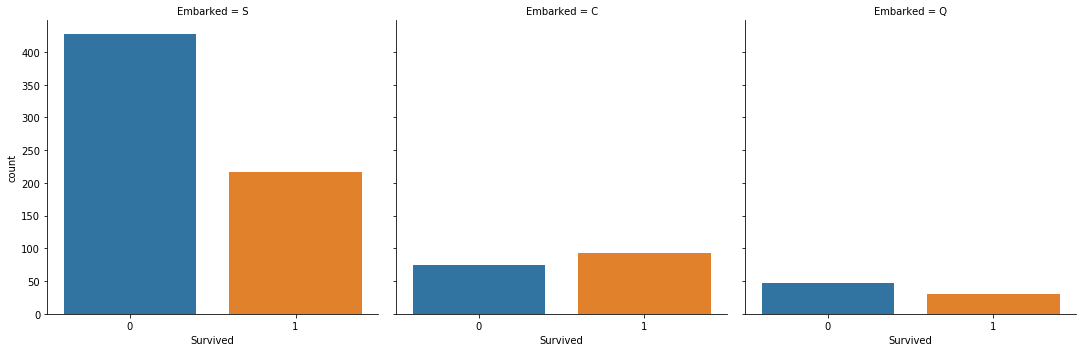

In [33]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=train_csv)

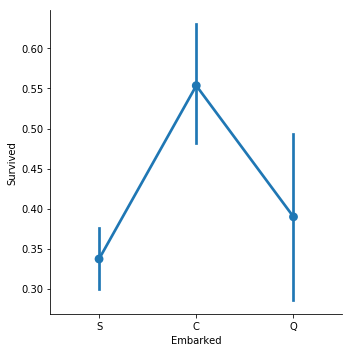

In [34]:
sns.catplot('Embarked', 'Survived', kind='point', data=train_csv)

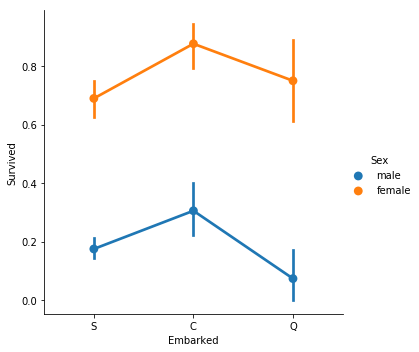

In [35]:
sns.catplot('Embarked', 'Survived', hue='Sex', kind='point', data=train_csv)

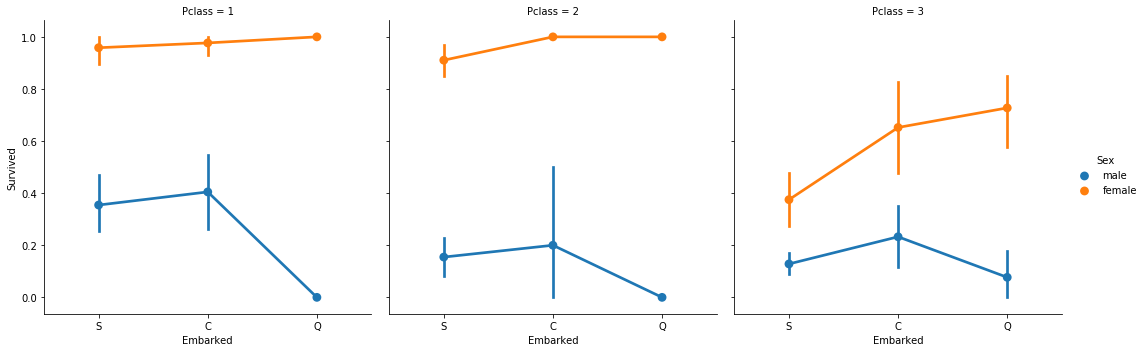

In [36]:
sns.catplot('Embarked', 'Survived', col='Pclass', hue='Sex', kind='point', data=train_csv)

In [37]:
pd.crosstab([train_csv.Survived], [train_csv.Sex, train_csv.Pclass, train_csv.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

In [38]:
train_csv.Age.min(), train_csv.Age.max()

(0.42, 80.0)

C:\Users\owner\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\owner\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\owner\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\owner\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


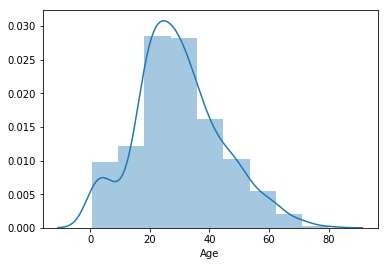

In [39]:
sns.distplot(train_csv.Age, bins=9, kde=True)

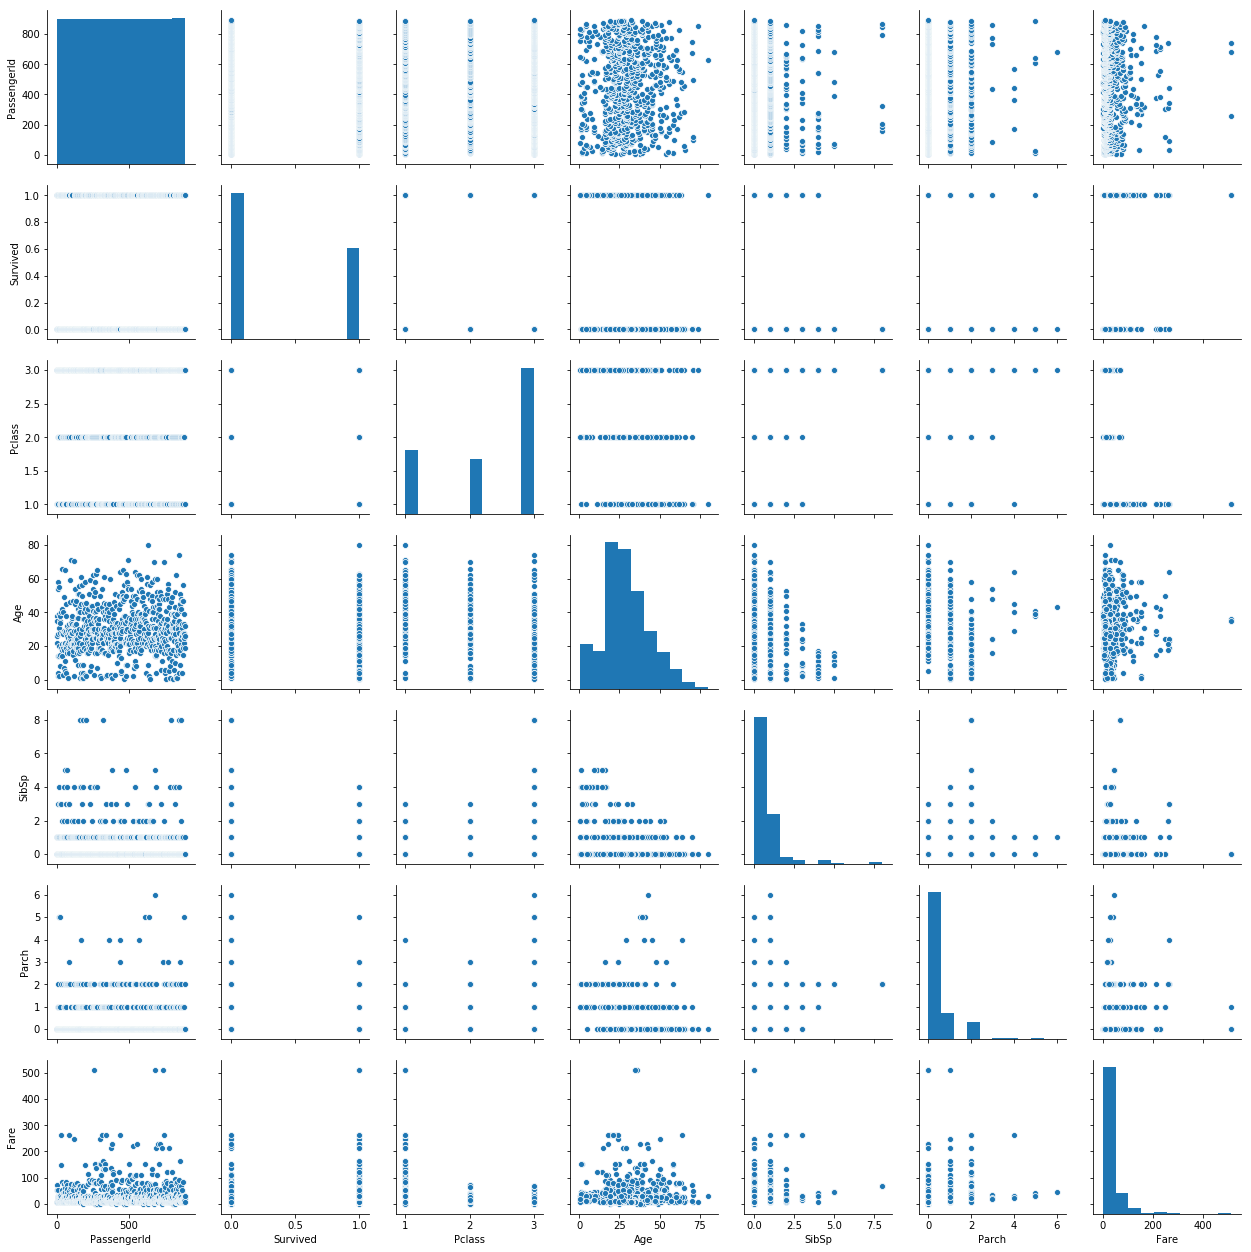

In [40]:
sns.pairplot(train_csv)

In [41]:
train_csv['Age_bin'] = train_csv.Age // 10

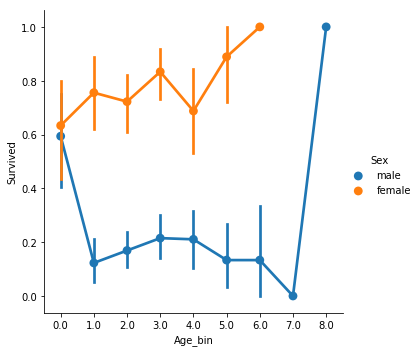

In [42]:
sns.catplot('Age_bin', 'Survived', hue='Sex', kind='point', data=train_csv)

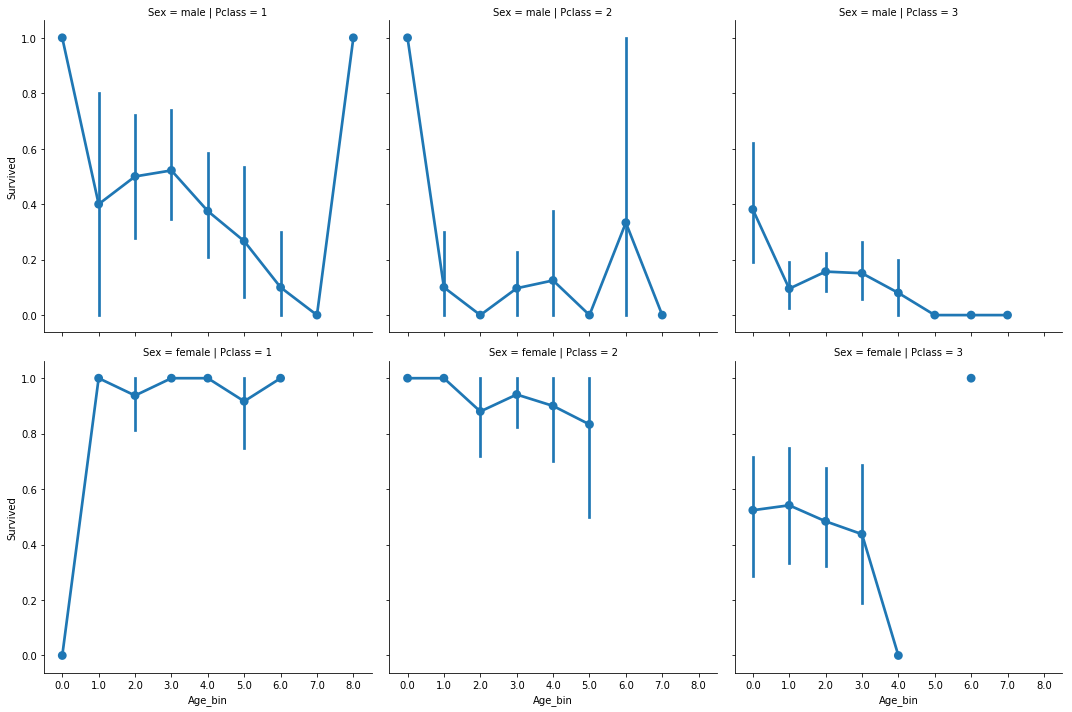

In [43]:
sns.catplot('Age_bin', 'Survived', col='Pclass', row='Sex', kind='point', data=train_csv)

In [44]:
pd.crosstab([train_csv.Sex, train_csv.Survived], [train_csv.Age_bin, train_csv.Pclass], margins=True).style.background_gradient(cmap='autumn_r').set_properties(color='black')

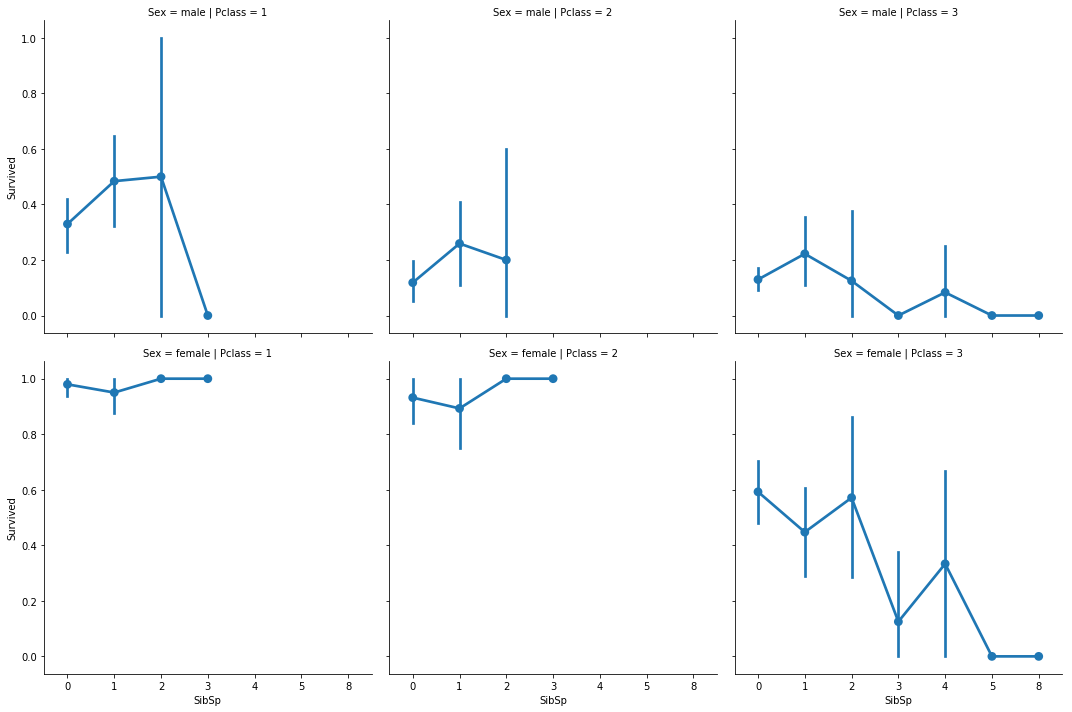

In [45]:
sns.catplot('SibSp', 'Survived', col='Pclass', row='Sex', kind='point', data=train_csv)

In [46]:
pd.crosstab([train_csv.Sex, train_csv.Survived], [train_csv.SibSp, train_csv.Pclass], margins=True).style.background_gradient(cmap='autumn_r').set_properties(color='black')

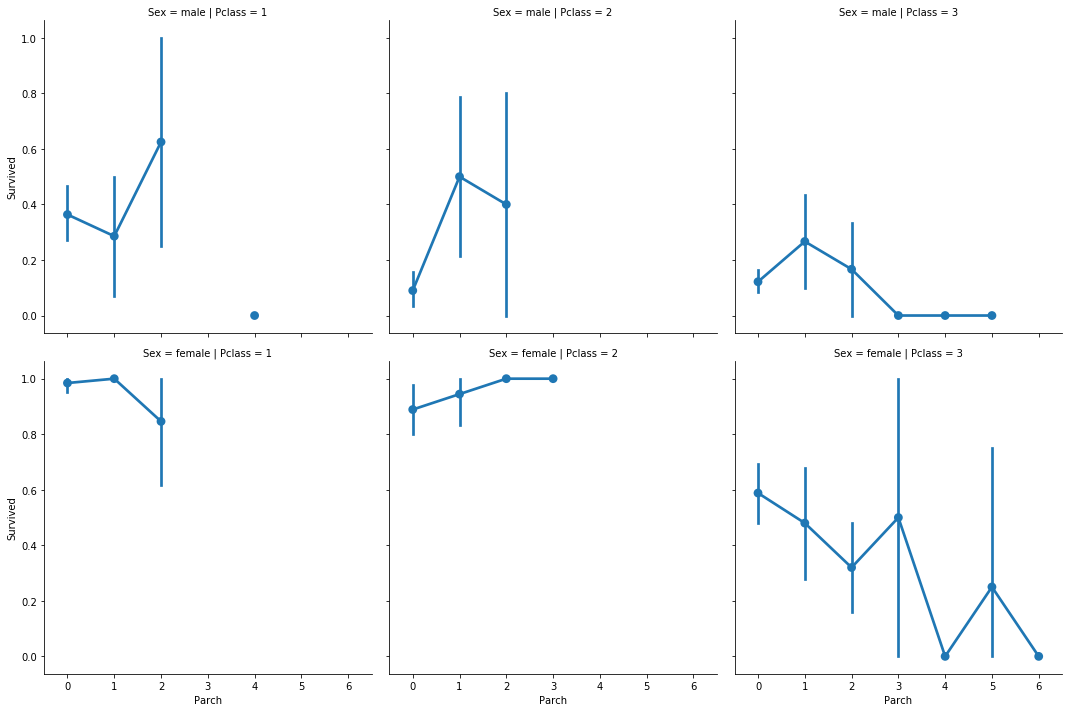

In [47]:
sns.catplot('Parch', 'Survived', col='Pclass', row='Sex', kind='point', data=train_csv)

In [48]:
pd.crosstab([train_csv.Sex, train_csv.Survived], [train_csv.Parch, train_csv.Pclass], margins=True).style.background_gradient(cmap='autumn_r').set_properties(color='black')

In [49]:
pd.crosstab([train_csv.Sex, train_csv.Survived], [train_csv.Pclass, train_csv.Parch], margins=True).style.background_gradient(cmap='autumn_r').set_properties(color='black')

In [50]:
train_csv.Fare.min(), train_csv.Fare.max()

(0.0, 512.3292)

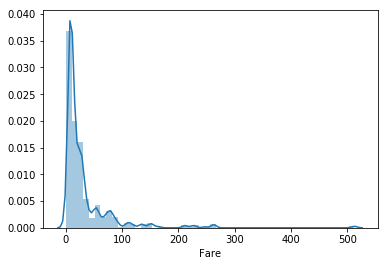

In [51]:
sns.distplot(train_csv.Fare)

In [52]:
train_csv['Fare_bin'] = train_csv.Fare // 20

In [53]:
train_csv.Fare_bin.value_counts()

0.0     515
1.0     200
2.0      54
3.0      46
4.0      23
6.0      11
5.0      11
7.0       9
13.0      6
11.0      5
10.0      4
25.0      3
8.0       2
12.0      2
Name: Fare_bin, dtype: int64

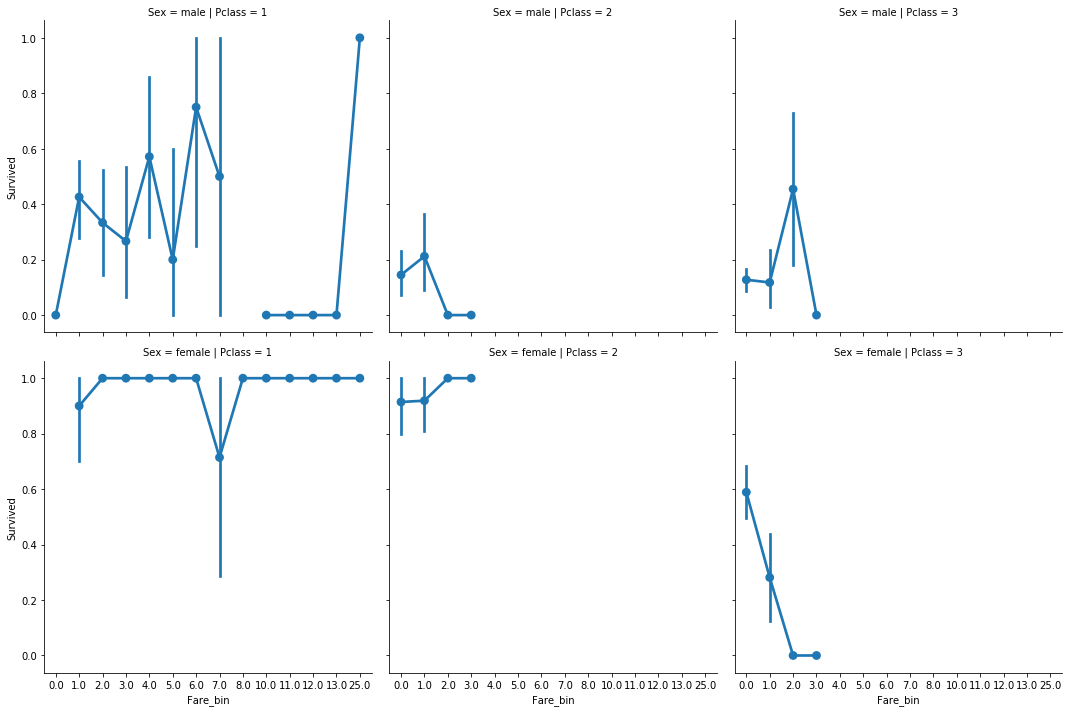

In [54]:
sns.catplot('Fare_bin', 'Survived', col='Pclass', row='Sex', kind='point', data=train_csv)

In [55]:
pd.crosstab([train_csv.Sex, train_csv.Survived], [train_csv.Fare_bin, train_csv.Pclass], margins=True).style.background_gradient(cmap='autumn_r').set_properties(color='black')

In [56]:
pd.crosstab([train_csv.Sex, train_csv.Survived], [train_csv.Pclass, train_csv.Fare_bin], margins=True).style.background_gradient(cmap='autumn_r').set_properties(color='black')